In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
AY = pd.read_csv('Salaries.csv')

C:\Users\MY PC\AppData\Local\Temp\ipykernel_1332\3603181705.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  AY = pd.read_csv('Salaries.csv')


AN OVERVIEW OF THE DATA BEFORE CLEANING

In [3]:
AY.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
a =len(AY['EmployeeName'][:])
a    

148654

In [5]:
AY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [6]:
AY.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [7]:
AY.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

CLEANING DATA BEGINS

In [8]:
del AY['Benefits']
del AY['Notes']
del AY['Status']

In [9]:
AY=AY[~AY.OvertimePay.str.contains('Not Provided', na=False)]
AY=AY[~AY.BasePay.str.contains('Not Provided', na = False) ]


In [10]:
AY['BasePay']= AY['BasePay'].astype('float')
AY['OtherPay']= AY['OtherPay'].astype('float')
AY['OvertimePay']= AY['OvertimePay'].astype('float')

In [11]:
AY.dropna(subset = ['BasePay'], inplace = True)

CLEANING DATA ENDS

 AN OVERVIEW OF THE CLEAN DATA

In [12]:
AY.to_csv('new salary.csv')

In [13]:
AY.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


In [14]:
AY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148045 non-null  int64  
 1   EmployeeName      148045 non-null  object 
 2   JobTitle          148045 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148045 non-null  float64
 5   OtherPay          148045 non-null  float64
 6   TotalPay          148045 non-null  float64
 7   TotalPayBenefits  148045 non-null  float64
 8   Year              148045 non-null  int64  
 9   Agency            148045 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 12.4+ MB


In [15]:
AY.describe()

,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000
mean,74192.680030,66325.448841,5086.740800,3645.661408,75057.851048,94038.185067,2012.520653
std,42948.484911,42764.635495,11473.181557,8019.498636,50409.761170,62683.477905,1.119390
min,1.000000,-166.010000,-0.010000,-7058.590000,-618.130000,-618.130000,2011.000000
25%,37012.000000,33588.200000,0.000000,0.000000,36958.160000,45077.410000,2012.000000
50%,74023.000000,65007.450000,0.000000,817.170000,71644.710000,92675.510000,2013.000000
75%,111639.000000,94691.050000,4695.710000,4242.900000,106028.000000,133085.410000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


In [16]:
AY.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [17]:
#checking for duplicates
AY.duplicated().sum()

0

In [18]:
AY.corr()

,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204878,-0.080265,-0.101064,-0.208153,-0.088366,0.968354
BasePay,-0.204878,1.000000,0.266740,0.285655,0.954494,0.946595,0.033751
OvertimePay,-0.080265,0.266740,1.000000,0.319005,0.504634,0.467516,0.028680
OtherPay,-0.101064,0.285655,0.319005,1.000000,0.474024,0.425634,-0.002682
TotalPay,-0.208153,0.954494,0.504634,0.474024,1.000000,0.977153,0.034733
TotalPayBenefits,-0.088366,0.946595,0.467516,0.425634,0.977153,1.000000,0.154985
Year,0.968354,0.033751,0.028680,-0.002682,0.034733,0.154985,1.000000


DATA ANALYSIS BEGINS

In [19]:
#Q1-- WHAT IS THE AVERAGE BASEPAY
AY['BasePay'].mean()

66325.44884050643

In [20]:
#Q2-- WHAT IS THE HIGHEST AMOUNT OF OVERTIME PAY IN THE DATASET
AY['OvertimePay'].max()

245131.88

In [21]:
#Q3-- WHO HAS THE HIGHEST AMOUNT OF OVERTIMEPAY
AY.sort_values('OvertimePay', ascending = False).head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco


In [22]:
#Q3-- WHAT IS THE JOB TITLE OF JOSEPH DRISCOLL
#METHOD 1
DF=AY.loc[AY['EmployeeName'] == 'JOSEPH DRISCOLL']
(DF)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,270324.91,270324.91,2011,San Francisco


In [23]:
#METHOD 2
name_ind = AY.set_index('EmployeeName')
name_ind.loc['JOSEPH DRISCOLL']

Id                                         25
JobTitle            CAPTAIN, FIRE SUPPRESSION
BasePay                             140546.86
OvertimePay                          97868.77
OtherPay                             31909.28
TotalPay                            270324.91
TotalPayBenefits                    270324.91
Year                                     2011
Agency                          San Francisco
Name: JOSEPH DRISCOLL, dtype: object

In [24]:
#Q4= HOW MUCH DOES JOSEPH DRISCOLL MAKE
J_TOT = (140546.86 + 97868.77 + 31909.28 + 270324.91 + 270324.91 )
J_TOT

810974.73

In [25]:
name_ind.reset_index().head()

,EmployeeName,Id,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


In [26]:
#Q5--WHAT IS THE NAME OF THE HIGHEST PAID PERSON BY TOTAL BENEFITS
#METHOD 1
AY.sort_values('TotalPayBenefits', ascending = False).head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011,San Francisco


In [27]:
#METHOD 2
total_ind = AY.set_index('TotalPayBenefits')
AY['TotalPayBenefits'].max()
total_ind.loc[567595.43]

Id                                                           1
EmployeeName                                    NATHANIEL FORD
JobTitle        GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                              167411.18
OvertimePay                                                0.0
OtherPay                                             400184.25
TotalPay                                             567595.43
Year                                                      2011
Agency                                           San Francisco
Name: 567595.43, dtype: object

In [28]:
#QUESTION 6-- WHAT IS THE NAME OF THE LOWEST PAID PERSON BY TOTAL BENEFITS
#METHOD 1
AY.sort_values('TotalPayBenefits', ascending = True).head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,-618.13,-618.13,2014,San Francisco


In [29]:
# METHOD 2
AY['TotalPayBenefits'].min()
total_ind.loc[-618.13]

Id                                  148654
EmployeeName                     Joe Lopez
JobTitle        Counselor, Log Cabin Ranch
BasePay                                0.0
OvertimePay                            0.0
OtherPay                           -618.13
TotalPay                           -618.13
Year                                  2014
Agency                       San Francisco
Name: -618.13, dtype: object

In [30]:
AY.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


In [31]:
#QUESTION 7--WHAT IS THE AVERAGE BASEPAY OF ALL EMPLOYEES PER YEAR
AY.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

Text(0.5, 1.0, 'Mean BasePay of employees per year')

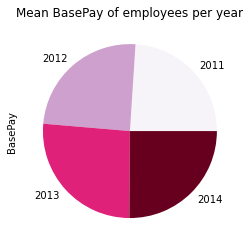

In [32]:
AY.groupby('Year').mean()['BasePay'].plot(kind ='pie', cmap = 'PuRd')
plt.title('Mean BasePay of employees per year')

In [33]:
#QUESTION 8 -- HOW MANY UNIQUE JOB TITLES ARE THERE
AY['JobTitle'].nunique()

2154

In [34]:
#QUESTION 9-- WHAT ARE THE MOST COMMON 5 JOB
#METHOD 1
CJ = AY['JobTitle'].value_counts().head(5)
CJ


Transit Operator                6975
Special Nurse                   4382
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Name: JobTitle, dtype: int64

Text(0.5, 1.0, '5 MOST COMMON JOBS')

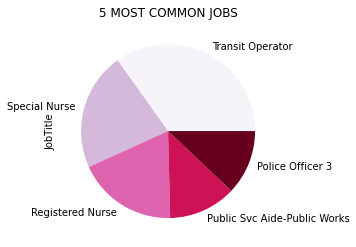

In [35]:
CJ.plot(kind = 'pie', cmap = 'PuRd')
plt.title('5 MOST COMMON JOBS')

In [36]:
#METHOD 2
n = 5
AY['JobTitle'].value_counts()[:n].index.tolist()

['Transit Operator',
 'Special Nurse',
 'Registered Nurse',
 'Public Svc Aide-Public Works',
 'Police Officer 3']

In [37]:
#QUESTION 10-- HOW MANY JOB TITLES WERE REPRESENTED BY ONLY ONE PERSON IN 2013
Rep = AY[AY['Year']== 2013]
A = Rep.groupby('JobTitle').count()
Headcount = A[A['Id']==1]
Headcount.count()['Id']

202

In [56]:
#QUESTION 11-- HOW MANY PEOPLE HAVE THE WORD CHEIF IN THEIR JOBTITLE
bee= AY['EmployeeName'].str.contains('cheif')
bee.count()


148045

DATA VISUALIZATION

In [38]:
list = ['Transit Operator', 'Special Nurse', 'Registered Nurse ',  'Public Svc Aide-Public Works', 'Police Officer 3  ' ]
exp = (0.2,0,0,0,0)
col = ('red', 'orange', 'yellow', 'blue', 'green')

Text(0.5, 1.0, '5 MOST COMMON JOBS')

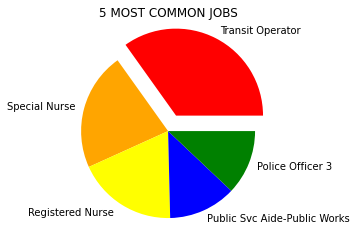

In [39]:
plt.pie(CJ, labels = list, explode = exp, colors = col)
plt.title('5 MOST COMMON JOBS')

In [48]:
titi =AY.nlargest(10,['TotalPay'])
titi

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,471952.64,510732.68,2014,San Francisco
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,390111.98,479652.21,2014,San Francisco
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,362844.66,407274.78,2012,San Francisco
36167,36168,John Goldberg,Captain 3,104404.00,0.00,245999.41,350403.41,374690.64,2012,San Francisco
72927,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,131217.63,29648.27,347102.32,404167.27,2013,San Francisco
110536,110537,Ellen G Moffatt,Asst Med Examiner,270222.04,6009.22,67956.20,344187.46,415767.94,2014,San Francisco
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,339653.70,436224.36,2014,San Francisco
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,339282.07,425815.28,2013,San Francisco


In [49]:
y = titi['TotalPay']
x = titi['EmployeeName']

<BarContainer object of 10 artists>

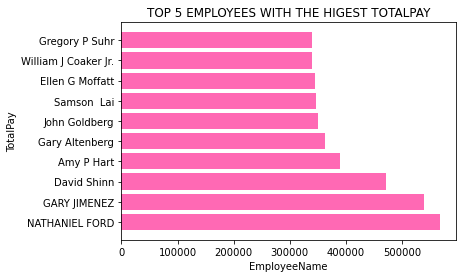

In [50]:
plt.xlabel('EmployeeName')
plt.ylabel('TotalPay')
plt.title('TOP 5 EMPLOYEES WITH THE HIGEST TOTALPAY')
plt.barh(x,y, color ='hotpink')

<AxesSubplot:>

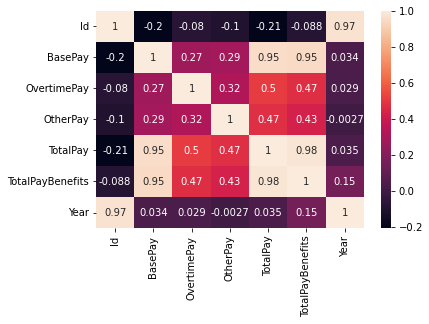

In [43]:
sns.heatmap(AY.corr(), annot = True)


PLAYING AROUND

In [44]:
AY.sort_values('EmployeeName', ascending = False).head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
132614,132615,Zuri Jones,Deputy Probation Officer,66667.54,0.00,0.00,66667.54,89538.48,2014,San Francisco
49185,49186,Zuri Jones,Deputy Probation Officer,86588.52,0.00,0.00,86588.52,122350.86,2012,San Francisco
93463,93464,Zuri Jones,Deputy Probation Officer,71986.90,0.00,0.00,71986.90,94714.11,2013,San Francisco
134790,134791,Zuna T Luu,Custodian,54703.00,264.36,1120.55,56087.91,82151.22,2014,San Francisco
97363,97364,Zuna T Luu,Custodian,55026.00,0.00,1129.44,56155.44,80932.30,2013,San Francisco


In [45]:
AY.groupby('JobTitle').value_counts().loc['WIRE ROPE CABLE MAINTENANCE MECHANIC']

Id     EmployeeName       BasePay   OvertimePay  OtherPay   TotalPay   TotalPayBenefits  Year  Agency       
10831  MICHAEL RIVERA     74932.00  5459.67      13171.83   93563.50   93563.50          2011  San Francisco    1
7911   STEVEN CASHEN      74743.22  19823.48     13162.79   107729.49  107729.49         2011  San Francisco    1
4      CHRISTOPHER CHONG  77916.00  56120.71     198306.90  332343.61  332343.61         2011  San Francisco    1
2260   LEWIS HAZZARD      74628.31  61685.03     13089.86   149403.20  149403.20         2011  San Francisco    1
3312   PETER CONIDI       74932.00  50641.24     12162.41   137735.65  137735.65         2011  San Francisco    1
5278   EDDIE SZETO        74932.00  33041.53     14859.95   122833.48  122833.48         2011  San Francisco    1
7726   GREGORY ADAMS      74932.01  27212.92     6847.43    108992.36  108992.36         2011  San Francisco    1
7869   EDWIN DINOZO       74932.00  19292.17     13762.48   107986.65  107986.65         2011

In [46]:
AY['JobTitle'].count()

148045

In [47]:
AY['OvertimePay'].value_counts().loc[245131.88]

1

In [51]:
AY.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


In [71]:
bee= AY[AY['EmployeeName'].str.contains('cheif') ==True]


In [75]:
bee.value_counts()

Series([], dtype: int64)

In [58]:
AY.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.0,0.0,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.00,0.00,2014,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,-618.13,-618.13,2014,San Francisco
